# We are going to check the association and Prediction of Revenue. Finally deployment model for production with streamlit

In [1]:
#Import all packages required in for explanatory analysis and visualizations
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data set by copying the path and pasting here as shown below
pd=pd.read_csv("F:\\Sales_predictions\\sales_data.csv")


In [3]:
#hecking the first five rows
pd.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
#Viewing the last six rows of the dataset
pd.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


In [5]:
#checking the variables names
pd.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [6]:
#Types of datatypes in the dataset
pd.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

In [7]:
#To check how many rows and columns are there in sales_data
pd.shape

(113036, 18)

In [8]:
#Checking the dataset informations
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [9]:
#We are going to do descriptive statistic before we drop unnecessary variables
pd.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [10]:
# in this sections am going to drop some variable
pd.duplicated().sum()

1000

In [11]:
#Here we select the required variables for analysis
pd1=pd[['Year','Customer_Age','Customer_Gender','Sub_Category','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']]

In [12]:
pd1.head()

,Year,Customer_Age,Customer_Gender,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013,19,M,Bike Racks,8,45,120,590,360,950
1,2015,19,M,Bike Racks,8,45,120,590,360,950
2,2014,49,M,Bike Racks,23,45,120,1366,1035,2401
3,2016,49,M,Bike Racks,20,45,120,1188,900,2088
4,2014,47,F,Bike Racks,4,45,120,238,180,418


In [13]:
pd1.tail()

,Year,Customer_Age,Customer_Gender,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016,41,M,Vests,3,24,64,112,72,184
113032,2014,18,M,Vests,22,24,64,655,528,1183
113033,2016,18,M,Vests,22,24,64,655,528,1183
113034,2014,37,F,Vests,24,24,64,684,576,1260
113035,2016,37,F,Vests,23,24,64,655,552,1207


In [14]:
pd1.Year.max()

2016

In [15]:
pd1['Year'].max()

2016

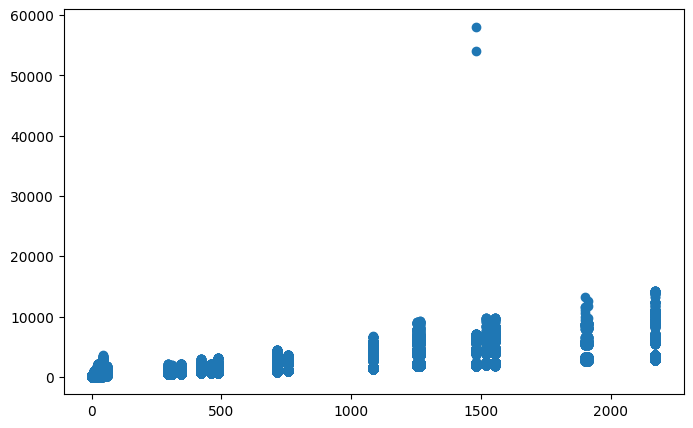

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(pd1.Unit_Cost,pd1.Revenue)
plt.show()

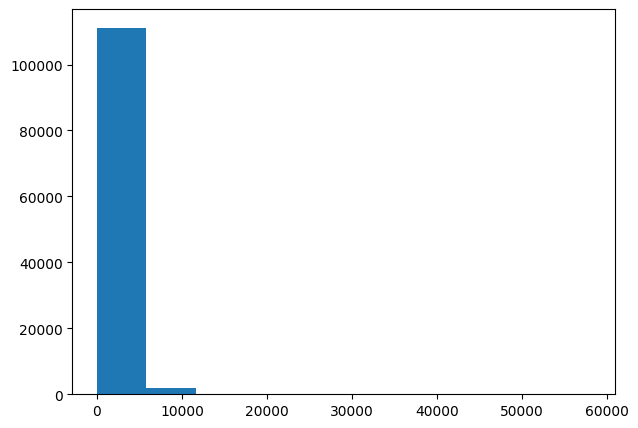

In [17]:
plt.figure(figsize=(7,5))
plt.hist(pd1.Revenue)
plt.show()

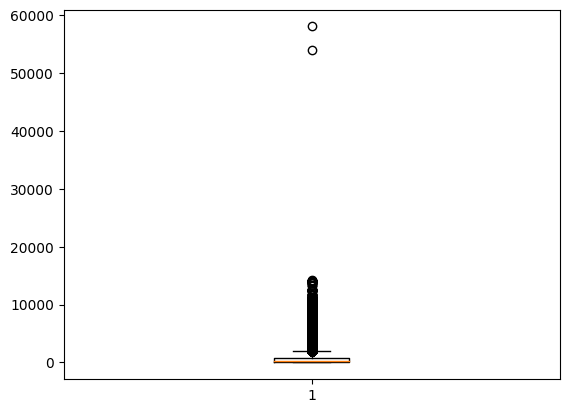

In [18]:
plt.boxplot(pd1.Revenue)
plt.show()

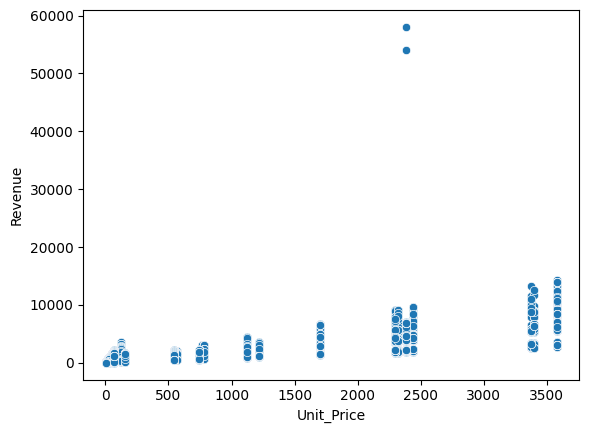

In [19]:
sns.scatterplot(x=pd1.Unit_Price,y=pd1.Revenue)
plt.show()

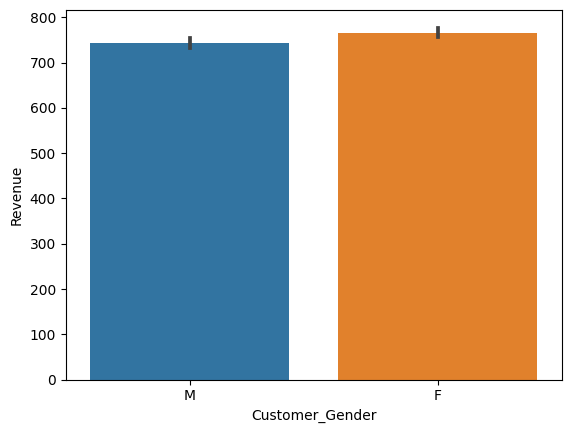

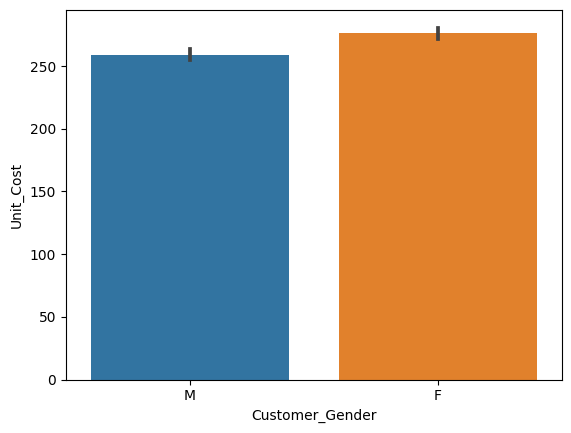

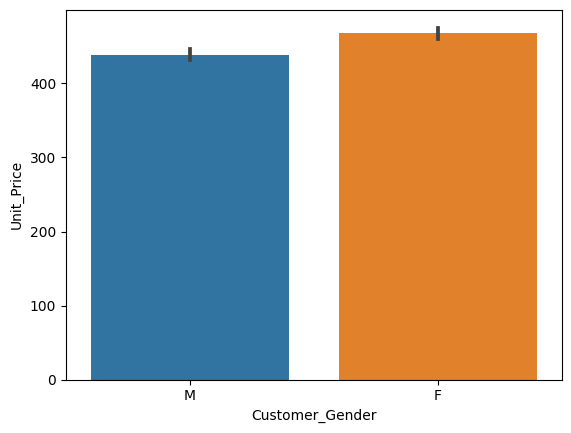

In [20]:
sns.barplot(x=pd1.Customer_Gender,y=pd1.Revenue)
plt.show()

sns.barplot(x=pd1.Customer_Gender,y=pd1.Unit_Cost)
plt.show()

sns.barplot(x=pd1.Customer_Gender,y=pd1.Unit_Price)
plt.show()

In [21]:
#Here we select the required variables for analysis
pd2=pd[['Year','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']]

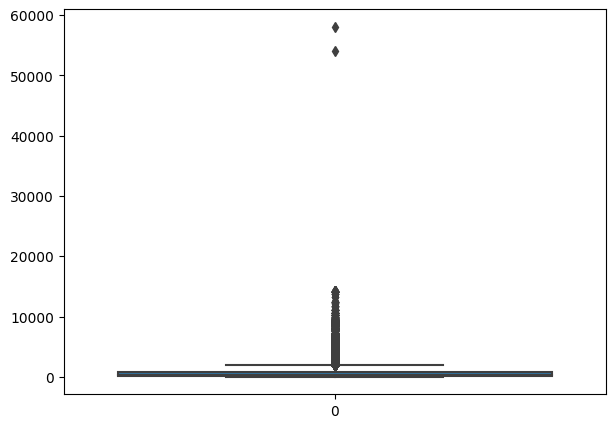

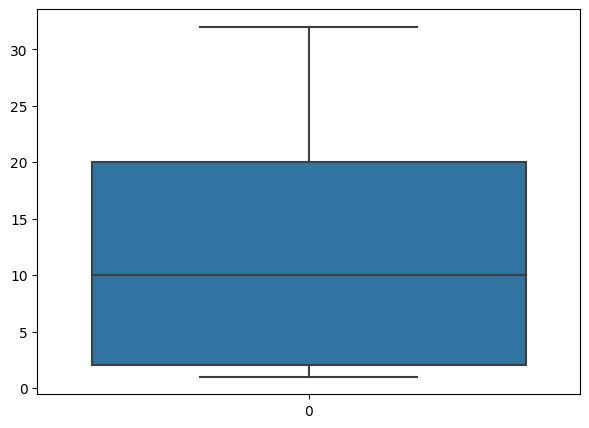

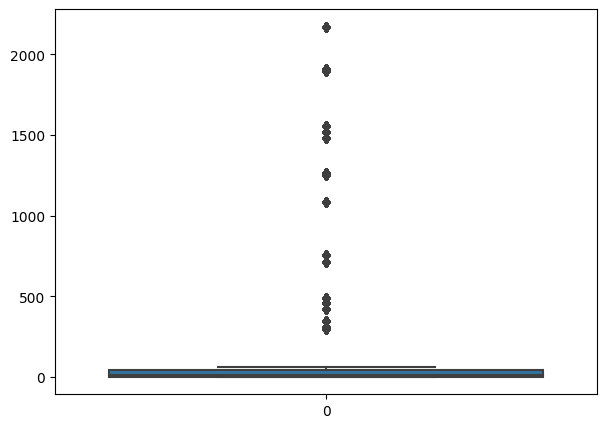

In [22]:
plt.figure(figsize=(7,5))
sns.boxplot(pd1.Revenue)
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(pd1.Order_Quantity)
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(pd1.Unit_Cost)
plt.show()





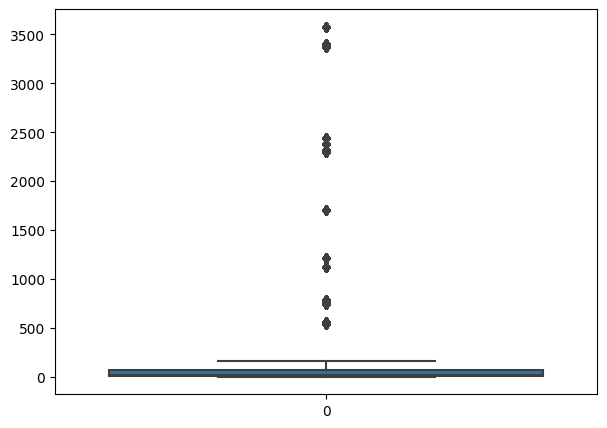

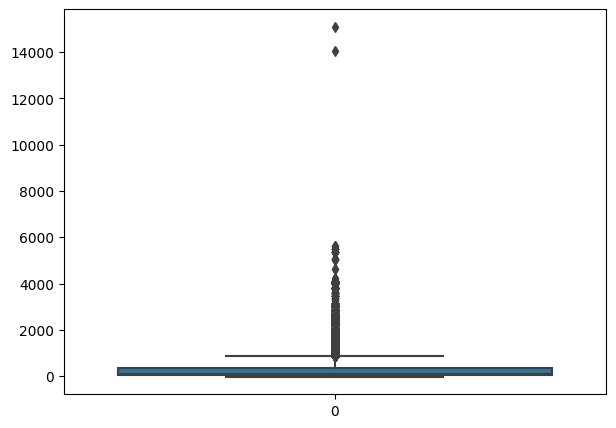

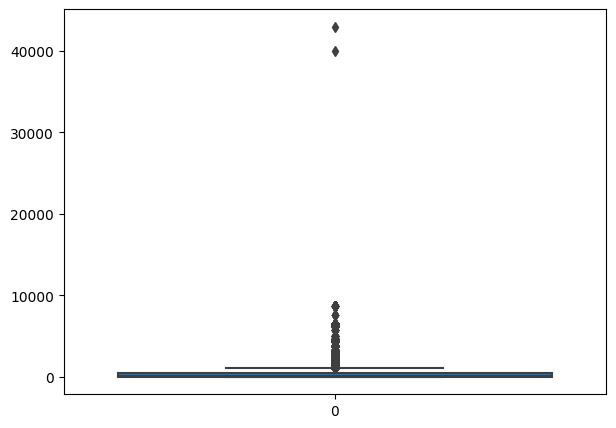

In [23]:
plt.figure(figsize=(7,5))
sns.boxplot(pd1.Unit_Price)
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(pd1.Profit)
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(pd1.Cost)
plt.show()

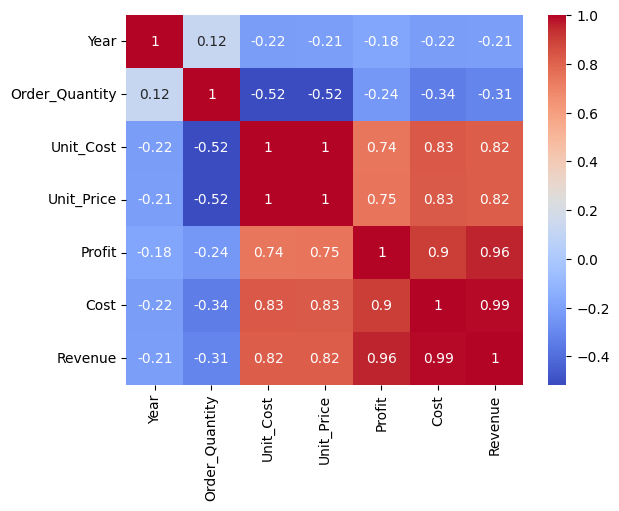

In [24]:
sns.heatmap(pd2.corr(),cmap='coolwarm',annot=True)
plt.show()

# Modelling of the data

In [32]:
# import the package for creating algorithm for modelling the data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score

In [33]:
X=pd2[['Year','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost']]
Y=pd2['Revenue']

In [34]:
X.dtypes

Year              int64
Order_Quantity    int64
Unit_Cost         int64
Unit_Price        int64
Profit            int64
Cost              int64
dtype: object

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
model=LinearRegression()

In [37]:
f=model.fit(X_train,Y_train)

In [38]:
f.score(X_train,Y_train)

1.0

In [39]:
model1=LogisticRegression()

In [40]:
f1=model.fit(X_train,Y_train)

In [41]:
f1.score(X_train,Y_train)

1.0

# Model Evaluation 

In [54]:
#Checking the how the model is linearly fitted by use R squqre as coefficient of determinations
r2_score(Y_test,predicted)

1.0

# Since the R square is 100% fitted the model good for deployment